In [9]:
#pip install -e ../../cirq_tools/

In [17]:
import cirq
import numpy as np 
import nmrfuncs as nfuncs
from noisy_simulation.cirq_utils import get_two_zoned_noisy_circ, optimize_circuit_to_cz_gate_set

from copy import copy, deepcopy


In [18]:
###Integrating noise models for generation of FID and comparing with noiseless simulations, and the trapped-ion noise model originally considered ..

from nmrfuncs import SzTot_weighted_obs, responseFunc_sample, addDepolarizingNoise, ZULF_circuitList,  ZULF_noiselessSim


def apodize_exp1d(St, k):
    St_fixed = deepcopy(St); St_fixed[0] = 0.5 * St_fixed[0]  # fixes double counting in the FFT so that the spectrum correctly starts at zero instead of having a constant shift
    x = np.linspace(0, 1, St_fixed.size)
    return St_fixed * np.exp(-1 * k * x)



def ZULF_noisySim_QuEra(t_ind_List, path, nmr_reg, weights, repetitions):
    simulator = cirq.DensityMatrixSimulator()
    responseFunc = []
    SzTot = np.array(SzTot_weighted_obs(len(nmr_reg), weights))
    for indt, t_ind in enumerate(t_ind_List):
        circuitList, SzTot_comp = ZULF_circuitList(t_ind, path, nmr_reg, SzTot)
        state_prob_list = []
        for circuit in circuitList:
            noisy_circuit = get_two_zoned_noisy_circ(optimize_circuit_to_cz_gate_set(circuit)) #addDepolarizingNoise(circuit, p1q, p2q)
            noisy_circuit.append([cirq.measure(*nmr_reg, key='measure_all')])
            run_result = simulator.run(program=noisy_circuit, repetitions=repetitions)
            histogram = run_result.histogram(key='measure_all')
            avg_pop = np.array([histogram[i] for i in range(int(2**len(nmr_reg)))])/repetitions
            state_prob_list.append(avg_pop)
#         print(indt)
        responseFunc.append(responseFunc_sample(state_prob_list, SzTot, SzTot_comp, len(nmr_reg)))
    return responseFunc






In [3]:
####gettting the FID....
num_qubits = 4
nmr_reg = [cirq.LineQubit(int(i)) for i in range(num_qubits)]
#spinach_datapath = '/Users/kis/Dropbox/NMR Learning/Code/matlab/spectrumSim/fid_data/'
#path = "evolution_circuits/acetonitrile/zf_ion/"
path = "./zf_ion_json/"
# npoints = 4096
npoints = 100
t_ind_List = np.array([i for i in range(npoints)]).astype(float)
# t_ind_List = np.arange(0,4096,0.5,dtype=float)
gamma_1H = 2.6752 * 1e8; gamma_13C = 0.6728 * 1e8
weights = np.array([gamma_1H, gamma_1H, gamma_1H, gamma_13C]) / gamma_1H
repetitions = 1000; p1q = 0.001; p2q = 0.02


#fid_raw = ZULF_noisySim_QuEra(t_ind_List, path, nmr_reg, weights,repetitions=100)

fid_raw_noiseless = ZULF_noiselessSim(t_ind_List, path, nmr_reg, weights,json_format=True)


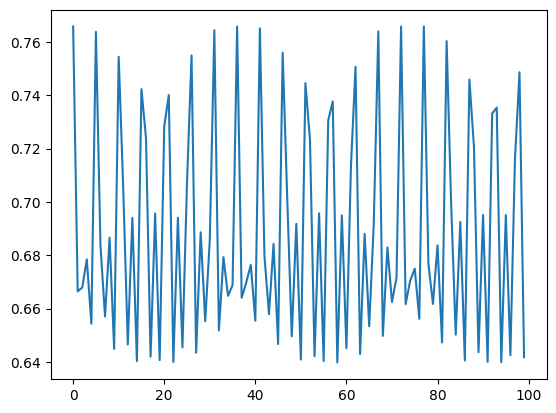

In [4]:
import matplotlib.pyplot as plt
plt.plot(fid_raw_noiseless)
plt.show()

In [ ]:
###Saving data...

#np.save('./data/two_zone_model_fid.npy', fid_raw)
#np.save('./data/fid_raw_noiseless.npy',fid_raw_noiseless)

In [5]:
cirq.read_json('./zf_ion_json/U_t_2.json')

┌──┐                ┌──┐                                                                                                                               ┌──┐                 ┌──┐
q_0: ───X^0.895───Z^(7/16)───H───@────────────────@───H───X^0.073───Z^0.491───H───@────────────────@───H───X^0.412───Z^0.506───H───@────────────────@───H───X^-0.278───Z^0.481─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────H───@─────────────────@───H───X^0.694───Z^0.232───H───@────────────────@───H───X^(-2/9)───Z^(14/15)───H───@─────────────────@───H───X^(-3/8)────Z^0.171───H─────@───────────────────@────H───X^0.891───────────────Z^0.46──────────────────────────────H──────────@────────────────@───H───X^0.47──────Z^0.567───H─────@────────────────────@────H───X^-0.344───Z^0.123───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────H───@────────────────@───H───X^0.425───Z^0.592───H───@────────────────@───H───X^0.761───Z^0.522───H───@─────────────────@───H───X^0.19────Z^0.904───H───@─────────────────@───H───X^-0.709───Z^(3/7)────H───@────────────────@───H───X^0.372────Z^0.374───H───@─────────────────@───H───X^-0.573───Z^0.574────H───@─────────────────@───H───X^0.596────Z^0.552───H───@────────────────@───H───X^0.4─────Z^0.398───H───@────────────────@───H───X^-0.672───Z^0.544────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────H───@────────────────@───H───X^-0.184───Z^(9/16)───H───@─────────────────@───H───X^0.567────Z^0.702────H───@────────────────@───H───X^-0.921───Z^0.753───X^-0.974──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                 │                │                               │                │                               │                │                                                                                                                                                                                      │                 │                               │                │                                  │                 │                                   │                   │                                                                             │                │                                   │                    │                                                                                                                                                                                         │                │                               │                │                               │                 │                               │                 │                                 │                │                                │                 │                                 │                 │                                │                │                               │                │                                                                                                                                                                                                 │                │                                 │                 │                                 │                │
q_1: ───X^0.4─────Z^0.606────H───X───Rz(0.495π)───X───H───X^0.622───Z^0.413───H───X───Rz(0.484π)───X───H───X^0.483───Z^0.587───H───X───Rz(0.492π)───X───H───X^-0.84────Z^0.135───H───@────────────────@───H───X^-0.58───Z^0.747───H───@────────────────@───H───X^0.65──────Z^0.101───H───@────────────────@───H───X^-0.547───Z^0.685───────┼─────────────────┼───────────────────────────────┼────────────────┼──────────────────────────────────┼─────────────────┼─────────────────

In [4]:
cirq.read_json('./zf_ion_json/U_t_643.json')

q_0: ───X^0.544────Z^0.433───H───@────────────────@───H───X^0.712───Z^0.348───H───@─────────────────@───H───X^(5/13)───Z^0.623───H───@─────────────────@───H───X^0.628────Z^0.826───H───@─────────────────@───H───X^-0.399───Z^0.382───H───@─────────────────@───H───X^(-5/11)───Z^0.426───H───@─────────────────@───H───X^(-1/8)───Z^0.806───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────H───@─────────────────@───H───X^0.528────Z^0.386────H───@─────────────────@───H───X^(-9/16)───Z^0.21────H───@─────────────────@───H───X^(5/9)───Z^0.44────H───@────────────────@───H───X^0.439───Z^0.549───H───@─────────────────@───H───X^(-7/15)───Z^(7/11)───H───@────────────────@───H───X^0.11─────Z^(2/15)───X^-0.105─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                 │                │                               │                 │                                │                 │                                │                 │                                │                 │                                 │                 │                                                                                                                                                                                        │                 │                                 │                 │                                 │                 │                               │                │                               │                 │                                  │                │
q_1: ───X^0.108────Z^0.477───H───X───Rz(0.454π)───X───H───X^0.329───Z^0.647───H───X───Rz(-0.455π)───X───H───X^-0.623───Z^0.617───H───X───Rz(-0.398π)───X───H───X^-0.597───Z^0.441───────┼─────────────────┼────────────────────────────────┼─────────────────┼─────────────────────────────────┼─────────────────┼────────────────────────────H───@────────────────@───H───X^(-14/15)───Z^0.424───H───@─────────────────@───H───X^-0.599───Z^(5/9)───H───@────────────────@───H───X^0.127───Z^0.412───────┼─────────────────┼─────────────────────────────────┼─────────────────┼─────────────────────────────────┼─────────────────┼───────────────────────────────┼────────────────┼───────────────────────────────┼─────────────────┼──────────────────────────────────┼────────────────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────H───@────────────────@───H───X^0.604────Z^0.823───H───@─────────────────@───H───X^-0.205───Z^0.317───H───@────────────────@───H───X^0.802────Z^0.432───X^-0.827───
                                                                                                                                                                                        │                 │                                │                 │                                 │                 │                                │                │                                  │                 │                                │                │                               │                 │                                 │                 │                                 │                 │                               │                │                               │                 │                                  │                │                                                                                                                                                                                                                │

In [15]:
for indt, t_ind in enumerate(t_ind_List):
    print(indt,t_ind)

0 0.0
1 1.0
2 2.0
3 3.0
4 4.0
5 5.0
6 6.0
7 7.0
8 8.0
9 9.0
10 10.0
11 11.0
12 12.0
13 13.0
14 14.0
15 15.0
16 16.0
17 17.0
18 18.0
19 19.0
20 20.0
21 21.0
22 22.0
23 23.0
24 24.0
25 25.0
26 26.0
27 27.0
28 28.0
29 29.0
30 30.0
31 31.0
32 32.0
33 33.0
34 34.0
35 35.0
36 36.0
37 37.0
38 38.0
39 39.0
40 40.0
41 41.0
42 42.0
43 43.0
44 44.0
45 45.0
46 46.0
47 47.0
48 48.0
49 49.0
50 50.0
51 51.0
52 52.0
53 53.0
54 54.0
55 55.0
56 56.0
57 57.0
58 58.0
59 59.0
60 60.0
61 61.0
62 62.0
63 63.0
64 64.0
65 65.0
66 66.0
67 67.0
68 68.0
69 69.0
70 70.0
71 71.0
72 72.0
73 73.0
74 74.0
75 75.0
76 76.0
77 77.0
78 78.0
79 79.0
80 80.0
81 81.0
82 82.0
83 83.0
84 84.0
85 85.0
86 86.0
87 87.0
88 88.0
89 89.0
90 90.0
91 91.0
92 92.0
93 93.0
94 94.0
95 95.0
96 96.0
97 97.0
98 98.0
99 99.0


# Result analysis

In [6]:
from matplotlib import pyplot as plt

In [20]:
fid_noisy = np.load('./data/two_zone_model_fid.npy')

In [21]:
len(fid_noisy)

100

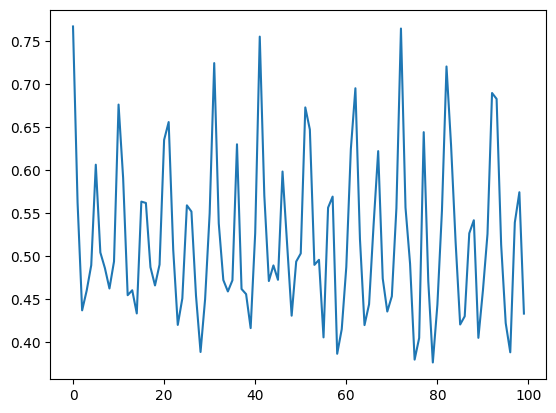

In [22]:
plt.plot(fid_noisy)

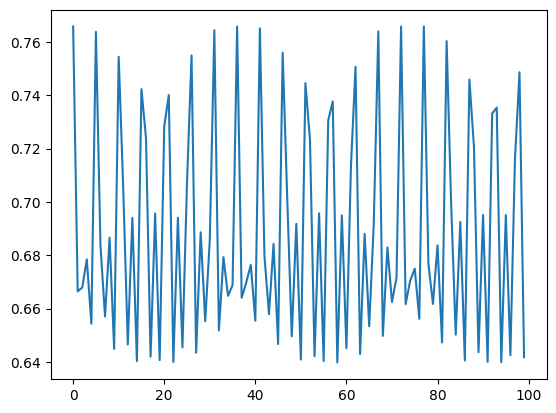

In [26]:
plt.plot(fid_raw_noiseless)

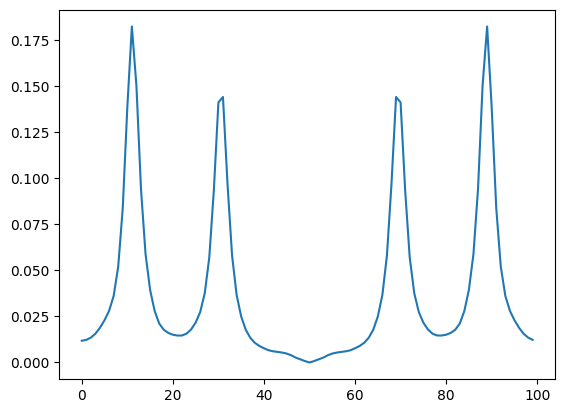

In [29]:
####Using nmr functions for the calculation of the spectrum...
fid_apo = apodize_exp1d(fid_raw_noiseless - np.mean(fid_raw_noiseless), 12)
#fid_apo = apodize_exp1d(np.array(fid_raw_noiseless), 12)
spec_apo = np.real(np.fft.fftshift(np.fft.fft(fid_apo)))
#fid_apo_aveHam = nfuncs.apodize_exp1d(fid_raw_aveHam - np.mean(fid_raw_aveHam), 12)
#spec_apo_aveHam = np.real(np.fft.fftshift(np.fft.fft(fid_apo_aveHam)))


plt.plot(spec_apo)


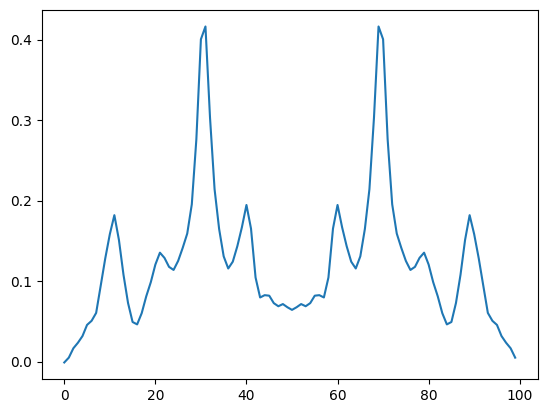

In [24]:
fid_apo = apodize_exp1d(fid_noisy - np.mean(fid_noisy), 12)
spec_apo_noisy = np.real(np.fft.fftshift(np.fft.fft(fid_apo)))
#fid_apo_aveHam = nfuncs.apodize_exp1d(fid_raw_aveHam - np.mean(fid_raw_aveHam), 12)
#spec_apo_aveHam = np.real(np.fft.fftshift(np.fft.fft(fid_apo_aveHam)))


plt.plot(spec_apo_noisy)

In [11]:
def plot_freq_domain_from_fid(fid,title='Spectrum'):
    fft_vals = np.fft.fft(fid)
    fft_freqs = np.fft.fftfreq(len(fid), 1/len(fid))

    fft_freqs_shifted = np.fft.fftshift(fft_freqs)
    fft_vals_shifted = np.fft.fftshift(fft_vals) 
    # Normalize the FFT magnitude
    fft_magnitude = 2.0 / len(fid_raw_noiseless) * np.abs(fft_vals_shifted)

    plt.scatter(fft_freqs_shifted[len(fft_magnitude)//2+1:],fft_magnitude[len(fft_magnitude)//2+1:])
    plt.plot(fft_freqs_shifted[len(fft_magnitude)//2+1:],fft_magnitude[len(fft_magnitude)//2+1:])
    plt.xlabel('Frequency',fontsize=20)
    plt.ylabel('Spectrum',fontsize=20)
    plt.title(title,fontsize=20)


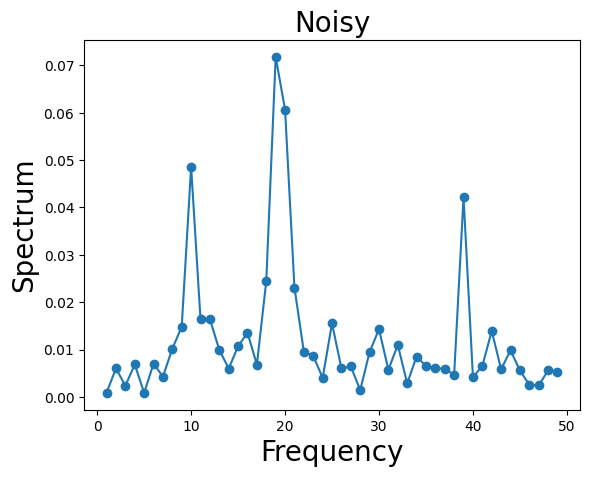

In [12]:
plot_freq_domain_from_fid(loaded_array,title='Noisy')

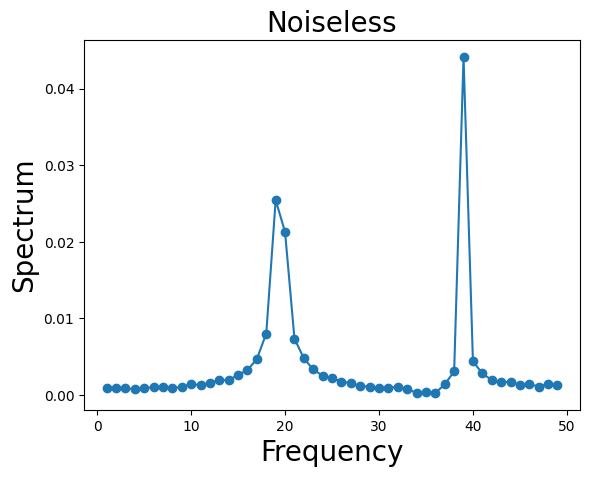

In [13]:
plot_freq_domain_from_fid(fid_raw_noiseless,title='Noiseless')

In [21]:
####checking the effect in the frequency domain...

# Compute FFT
fft_vals = np.fft.fft(fid_raw_noiseless)
fft_freqs = np.fft.fftfreq(len(fid_raw_noiseless), 1/len(fid_raw_noiseless))

fft_freqs_shifted = np.fft.fftshift(fft_freqs)
fft_vals_shifted = np.fft.fftshift(fft_vals) 
# Normalize the FFT magnitude
fft_magnitude = 2.0 / len(fid_raw_noiseless) * np.abs(fft_vals_shifted)


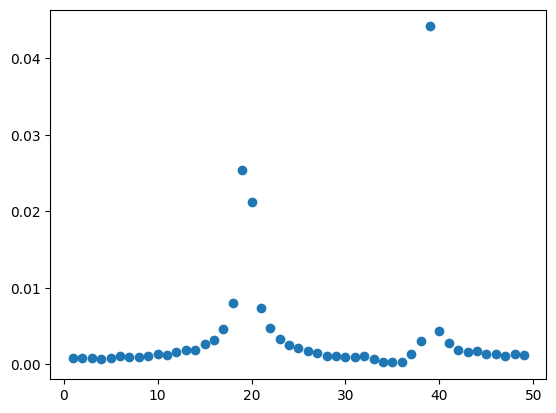

In [26]:
plt.scatter(fft_freqs_shifted[len(fft_magnitude)//2+1:],fft_magnitude[len(fft_magnitude)//2+1:])